In [27]:

import pandas as pd
import  numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [28]:

# Create dummy dataset
data = {
    "Experience": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [40, 45, 50, 55, 60, 65, 70, 80, 90, 100]  # in $1000s
}

In [29]:

# Convert to DataFrame
df = pd.DataFrame(data)

In [30]:
# Save to CSV
csv_path = "salary_data.csv"
df.to_csv(csv_path, index=False)

In [31]:
# Split dataset: 70% training, 20% testing, 10% leftover (for validation, etc.)
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, _ = train_test_split(
    temp_df, test_size=2/3, random_state=42)  # ~20% test

In [32]:
# Separate features and target
X_train = train_df[["Experience"]]
y_train = train_df["Salary"]
X_test = test_df[["Experience"]]
y_test = test_df["Salary"]


In [33]:

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:

# Predictions on test data
y_pred = model.predict(X_test)


c:\Users\abdul\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


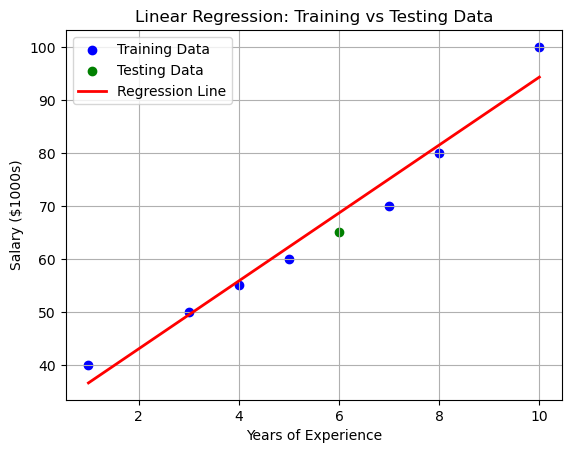

(30.198019801980188, 6.410891089108913, [(6, 65, 68.66336633663366)])

In [35]:

# Plotting Training Data
plt.scatter(X_train, y_train, color="blue", label="Training Data")

# Plotting Testing Data
plt.scatter(X_test, y_test, color="green", label="Testing Data")

# Regression Line (fit using training data)
line_x = np.linspace(df["Experience"].min(),
                     df["Experience"].max(), 100).reshape(-1, 1)
line_y = model.predict(line_x)
plt.plot(line_x, line_y, color="red", linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($1000s)")
plt.title("Linear Regression: Training vs Testing Data")
plt.legend()
plt.grid(True)
plt.show()

# Return coefficients and test predictions
(model.intercept_, model.coef_[0], list(
    zip(X_test["Experience"], y_test, y_pred)))